# **PROJECT - MALIGNANT COMMENTS CLASSIFICATION** 
## **Problem Statement**
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

## **Data Set Description**
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
#### The data set includes:
- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
- Highly Malignant: It denotes comments that are highly malignant and hurtful. 
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someone. 	
- Abuse: It is for comments that are abusive in nature. 
- Loathe: It describes the comments which are hateful and loathing in nature.  
- ID: It includes unique Ids associated with each comment text given.   
- Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 


You need to build a model that can differentiate between comments and its categories.  
Refer to the data set file provided along with this. 

 

## **Data Description**

- id :	A unique id aligned with each comment text. 
- comment_text :	It includes the comment text. 
- malignant :	It is a column with binary values depicting which comments are malignant in nature. 
- highly_malignant :	Binary column with labels for highly malignant text. 
- rude :	Binary column with labels for comments that are rude in nature. 
- threat :	Binary column with labels for threatening context in the comments. 
- abuse	: Binary column with labels with abusive behaviour.
- loathe :	Label to comments that are full of loathe and hatred. 
	
There may be some comments which have multiple labels on them, i.e. some comments may be both malignant and loathe. 	
	
	
You are provided with a large number of comments which have been labeled by human raters for malignant behaviour. 	
The types are:	
  -  Malignant
	- Highly_malignant
	- Rude
	- Threat
	- Abuse
	- Loathe
	
You must create a model to predict a probability of each type of toxicity for each comment. 	
	
	
## **File Description**
	
train.csv	the training set which contains comments with their binary labels. 
test.csv 	The test set for which the predictions are to be done. It includes id and comments_text. 

## **Objectives:**
- Perform proper data cleaning and text exploration. 
- Focus on data visualization and infer details from it. 
- Try to infer unique patterns from the data and try to generate new features. 
- Use 4-5 models for training, do proper hyperparameter tuning and choose the right evaluation metrics to finalize your model. 
- Test your predictions on multiple metrics like log loss, Recall and Precision.   
- Create a detailed report mentioning all the steps in the format of sample documentation file. 
- Create a powerpoint presentation of the project. 

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [2]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [3]:
# Read Data 
test = pd.read_csv('/content/drive/MyDrive/Malignant Comments Classifier Project/test.csv')
train =pd.read_csv('/content/drive/MyDrive/Malignant Comments Classifier Project/train.csv')

In [4]:
# There are six types of labels
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# shape(rows,columns)
print(train.shape, test.shape)

(159571, 8) (153164, 2)


In [7]:
# take only comments from test and train sets

train_text = train['comment_text']
test_text = test['comment_text']

df = pd.concat([train_text, test_text]).to_frame()
df.head()

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


# **EDA and Feature engineering:**
Let`s try to create some features and explore how they useful are:

- comment length - angry comments may be short, I mean, that the more aggressive the comment, the shorter it is;
- uppercase - angry comments usually have a lot of uppercase letters;
- emoji - angry users maybe not use a happy emoji (and emoji in general), also we could have a situation, in which emoji means sarcasm;
- punctuation - angry persons usually do not use , . : ? and etc, they maybe use a lot of "!" ;
- number of symbols - people usually encoded bad words with special symbols '@', '$' and etc;
- specific words for each category - with term frequency we can find the most common words in the category

In [8]:
# Statistical Summary
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Data types
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [10]:
# missing Values
train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
train['total_length'] = train['comment_text'].apply(len)
train['uppercase'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['exclamation_punctuation'] = train['comment_text'].apply(lambda comment: comment.count('!'))
train['num_punctuation'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:?'))
train['num_symbols'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_happy_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
train['num_sad_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-(', ':(', ';-(', ';(')))

In [12]:
test['total_length'] = test['comment_text'].apply(len)
test['uppercase'] = test['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
test['exclamation_punctuation'] = test['comment_text'].apply(lambda comment: comment.count('!'))
test['num_punctuation'] = test['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:?'))
test['num_symbols'] = test['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
test['num_words'] = test['comment_text'].apply(lambda comment: len(comment.split()))
test['num_happy_smilies'] = test['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
test['num_sad_smilies'] = test['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-(', ':(', ';-(', ';(')))

In [13]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_words,num_happy_smilies,num_sad_smilies
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0,7,0,43,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,1,5,0,17,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0,4,0,42,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0,6,0,113,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0,4,0,13,0,0


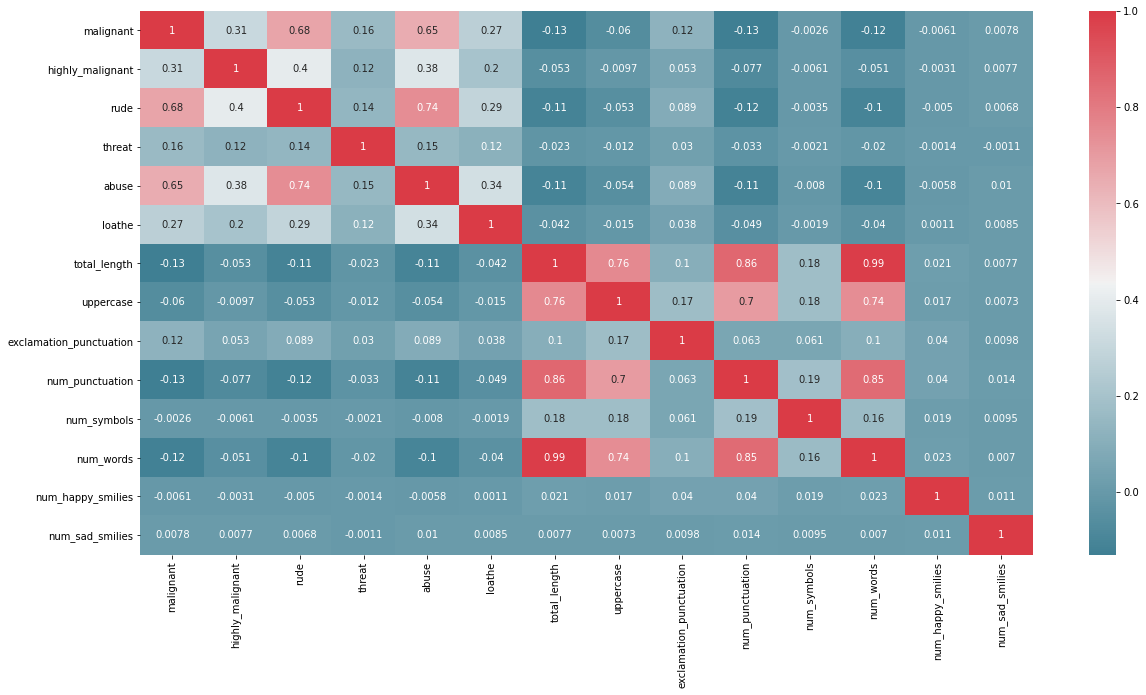

In [14]:
# Spearman correlation. 

corr = train.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

In [15]:
# let's drop one of the features which have a high correlation with another feature
# in our case, num_words have a very high correlation with the total length

train = train.drop(['num_words'], axis = 1)

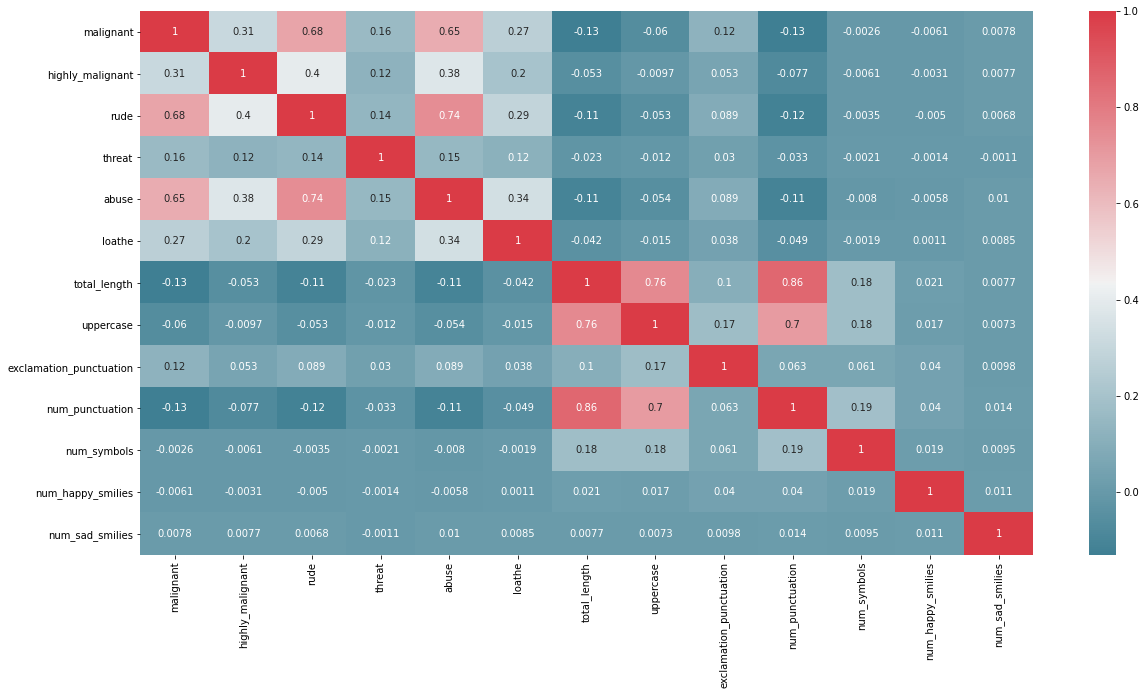

In [16]:
# Spearman correlation. 

corr = train.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

In [17]:
train_features_data = train
train_features_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0,7,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,1,5,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0,4,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0,6,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0,4,0,0,0


# **Explore each type of toxic comments**

In [18]:
train_features_data['toxic_type'] = ''
train_features_data['toxic_type'].loc[train_features_data['malignant'] == 1] += 'malignant '
train_features_data['toxic_type'].loc[train_features_data['highly_malignant'] == 1] += 'highly_malignant '
train_features_data['toxic_type'].loc[train_features_data['rude'] == 1] += 'rude '
train_features_data['toxic_type'].loc[train_features_data['threat'] == 1] += 'threat '
train_features_data['toxic_type'].loc[train_features_data['abuse'] == 1] += 'abuse '
train_features_data['toxic_type'].loc[train_features_data['loathe'] == 1] += 'loathe '

In [19]:
# The fisrt value is ''. It means, we have a lot of comment without any toxic
table_top = train_features_data['toxic_type'].value_counts().to_frame()[:10].style.background_gradient(cmap=cmap)
table_top

,toxic_type
,143346
malignant,5666
malignant rude abuse,3800
malignant rude,1758
malignant abuse,1215
malignant highly_malignant rude abuse,989
malignant rude abuse loathe,618
rude,317
abuse,301
malignant highly_malignant rude abuse loathe,265


In [20]:
train_features_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies,toxic_type
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0,7,0,0,0,
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,1,5,0,0,0,
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0,4,0,0,0,
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0,6,0,0,0,
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0,4,0,0,0,


# **Explore the length of comments**

In [21]:
df_malignant = train_features_data.loc[train_features_data['malignant'] == 1]
df_highly_malignant = train_features_data.loc[train_features_data['highly_malignant'] == 1]
df_rude = train_features_data.loc[train_features_data['rude'] == 1]
df_threat = train_features_data.loc[train_features_data['threat'] == 1]
df_abuse = train_features_data.loc[train_features_data['abuse'] == 1]
df_loathe = train_features_data.loc[train_features_data['loathe'] == 1]
df_normal = train_features_data.loc[train_features_data['toxic_type'] == '']

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(x=df_malignant.total_length, name='malignant'))
fig.add_trace(go.Histogram(x=df_highly_malignant.total_length, name='highly_malignant'))
fig.add_trace(go.Histogram(x=df_rude.total_length, name='rude'))
fig.add_trace(go.Histogram(x=df_threat.total_length, name='threat'))
fig.add_trace(go.Histogram(x=df_abuse.total_length, name='abuse'))
fig.add_trace(go.Histogram(x=df_loathe.total_length, name='loathe'))
fig.add_trace(go.Histogram(x=df_normal.total_length, name='normal'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

**Assumption about length is true. Non-toxic comments have a higher length.**

# **Explore how much types has each comment:**
- how much types has each comments;
- visualization means for that;

In [23]:
train_features_data['list_toxic_type'] = train_features_data['toxic_type'].apply(lambda row: row.split(' '))
train_features_data['list_toxic_type'] =train_features_data['list_toxic_type'].apply(lambda row: len(row)-1)
table_types = train_features_data['list_toxic_type'].value_counts().to_frame().style.background_gradient(cmap=cmap)
table_types

,list_toxic_type
0,143346
1,6360
3,4209
2,3480
4,1760
5,385
6,31


In [24]:
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==0] = 'normal comment'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==1] = 'has one type of toxic'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==2] = 'has two types of toxic'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==3] = 'has three types of toxic'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==4] = 'has four types of toxic'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==5] = 'has five types of toxic'
train_features_data['list_toxic_type'].loc[train_features_data['list_toxic_type']==6] = 'has six types of toxic'

In [25]:
types = ['normal comment', 'has one type of toxic', 'has two types of toxic', 'has three types of toxic',
         'has four types of toxic', 'has five types of toxic', 'has six types of toxic']

columns = ['total_length', 'uppercase', 'exclamation_punctuation',
                                'num_punctuation', 'num_symbols', 'num_happy_smilies', 'num_sad_smilies']

df_mean = pd.DataFrame(columns=columns)

In [26]:
for i, toxic_type in enumerate(types):
    for col in columns:    
        df_mean.at[i, col] = train_features_data[col].loc[train_features_data['list_toxic_type'] == toxic_type].mean()

In [27]:
df_mean['toxic_types'] = types

In [28]:
df_mean

,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies,toxic_types
0,404.402,14.2372,0.343442,8.63492,0.114332,0.00679475,0.000369735,normal comment
1,348.992,33.0003,2.57893,7.84009,0.145755,0.00707547,0.000628931,has one type of toxic
2,252.166,26.9336,1.77011,6.10345,0.135632,0.00287356,0.000574713,has two types of toxic
3,241.762,36.5336,3.64813,5.05037,0.14374,0.00617724,0.000712758,has three types of toxic
4,371.831,106.409,9.48636,6.15284,0.125,0.00340909,0.00340909,has four types of toxic
5,362.086,124.982,4.26494,7.03117,0.197403,0.012987,0,has five types of toxic
6,488.871,149.065,2.90323,13.0323,0,0,0,has six types of toxic


# **Generate Word Cloud**

In [29]:
from wordcloud import WordCloud,STOPWORDS

def showWordCloud(train, label):
  plt.figure(figsize=(15,12))

  text = train[train[label]==1]["comment_text"].tolist()
  label_img = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1200,
                          height=800,
                         ).generate(" ".join(text))

  plt.title(label,fontsize=40)
  plt.imshow(label_img)

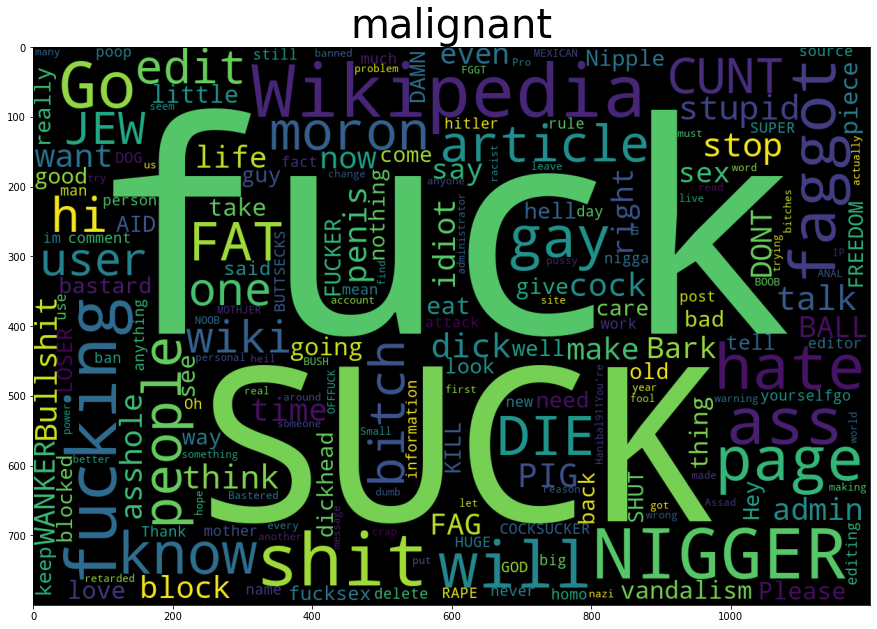

In [30]:
showWordCloud(train, "malignant")

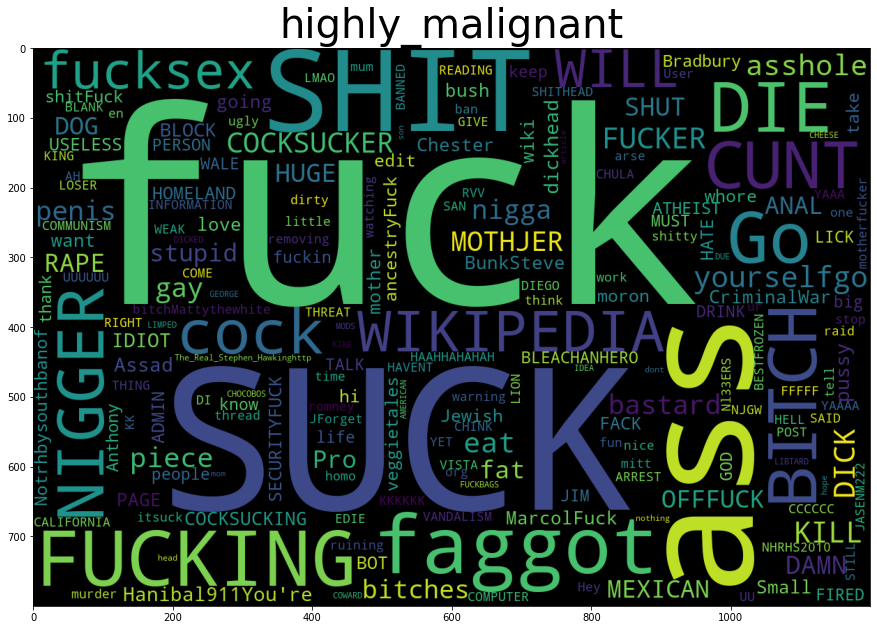

In [31]:
showWordCloud(train, "highly_malignant")

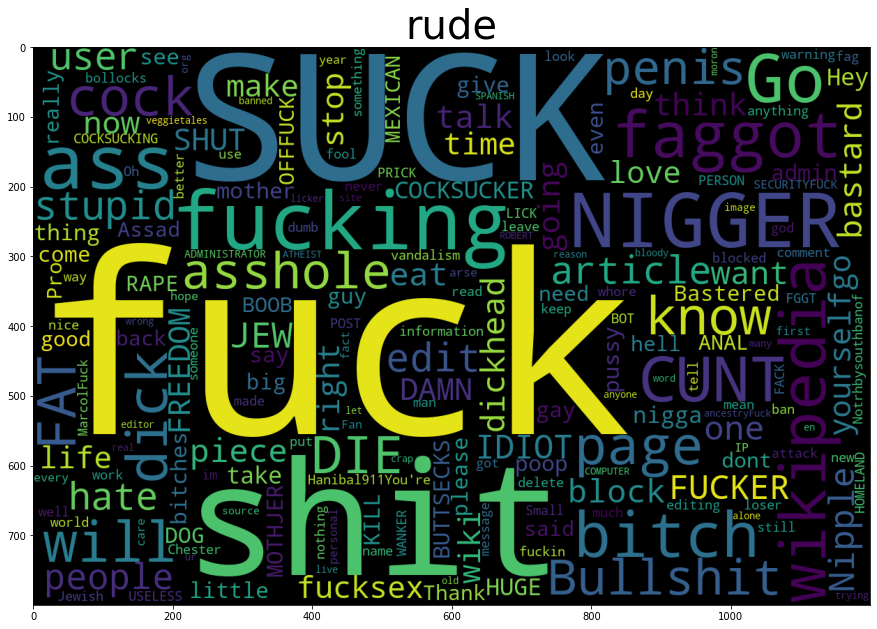

In [32]:
showWordCloud(train, "rude")

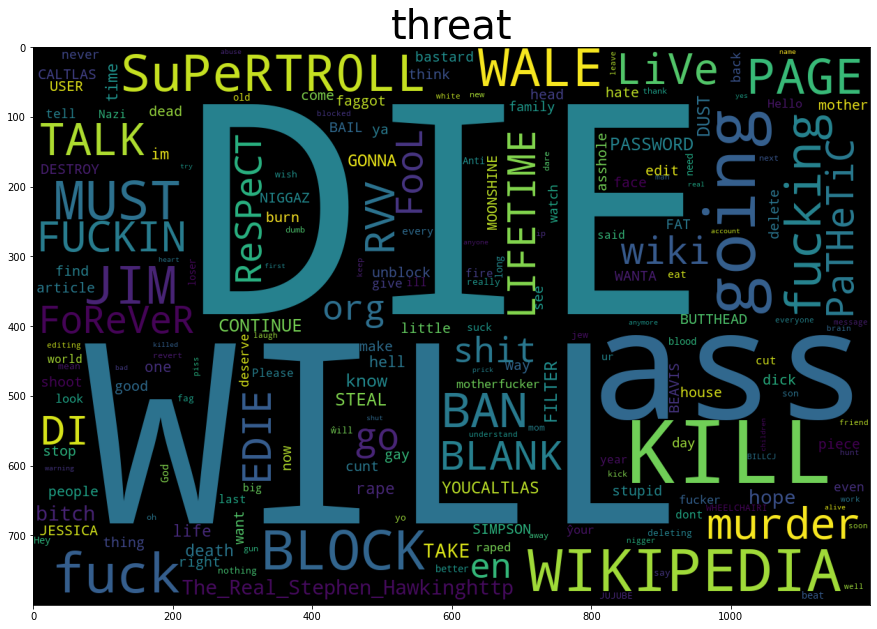

In [33]:
showWordCloud(train, "threat")

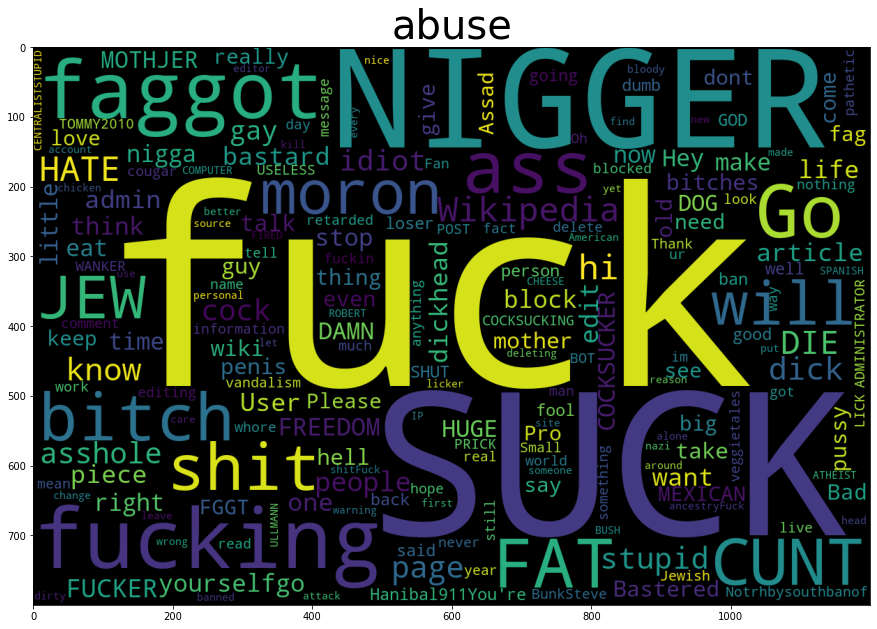

In [34]:
showWordCloud(train, "abuse")

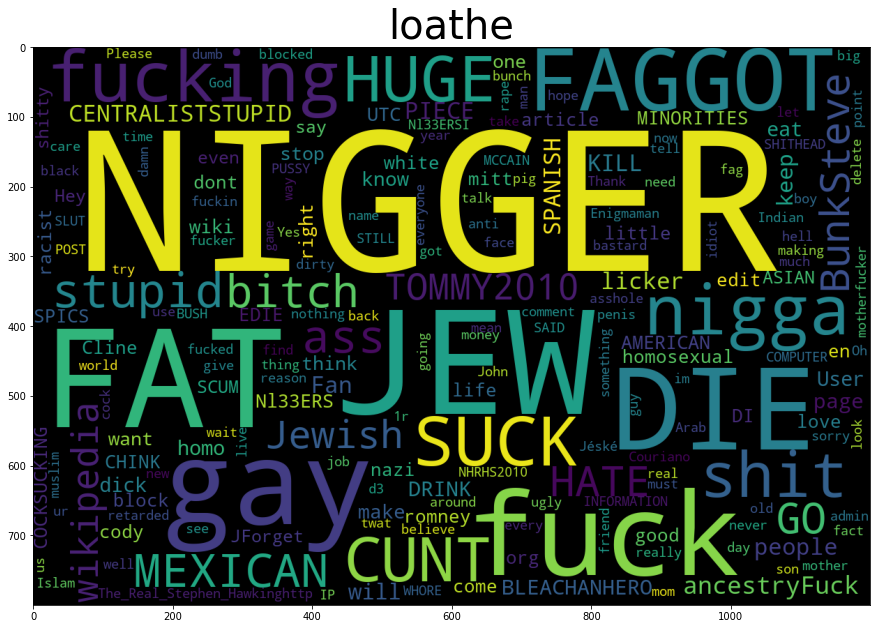

In [35]:
showWordCloud(train, "loathe")

In [36]:
df_mean['total_length'] = pd.to_numeric(df_mean['total_length'])
df_mean['uppercase'] = pd.to_numeric(df_mean['uppercase'])
df_mean['exclamation_punctuation'] = pd.to_numeric(df_mean['exclamation_punctuation'])
df_mean['num_punctuation'] = pd.to_numeric(df_mean['num_punctuation'])
df_mean['num_symbols'] = pd.to_numeric(df_mean['num_symbols'])
df_mean['num_happy_smilies'] = pd.to_numeric(df_mean['num_happy_smilies'])
df_mean['num_sad_smilies'] = pd.to_numeric(df_mean['num_sad_smilies'])

In [37]:
import plotly.express as px


px.scatter(df_mean, x="exclamation_punctuation", y="num_punctuation",
           size="total_length", color="toxic_types", hover_name="toxic_types",
           size_max=55)

- the comments with four toxic types are far from others;
- the comments with six toxic types have a lot of punctuation and an average number of exclamation punctuation;
-the normal types of comments have an average number of punctuation and a low number of exclamation punctuation.

# **Explore each toxic type:**

In [38]:
types = ['malignant', 'highly_malignant', 'rude', 'threat',
         'abuse', 'loathe']

df_types_mean = pd.DataFrame(columns=columns)

In [39]:
for i, toxic_type in enumerate(types):
    for col in columns:    
        df_types_mean.at[i, col] = train_features_data[col].loc[train_features_data[toxic_type] == 1].mean()

In [40]:
for col in columns:    
        df_types_mean.at[6, col] = train_features_data[col].loc[train_features_data['malignant'] == 0] \
                                                        .loc[train_features_data['highly_malignant'] == 0] \
                                                        .loc[train_features_data['rude'] == 0] \
                                                        .loc[train_features_data['threat'] == 0] \
                                                        .loc[train_features_data['abuse'] == 0] \
                                                        .loc[train_features_data['loathe'] == 0] \
                                                        .mean()

In [41]:
df_types_mean

,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies
0,295.414,44.1933,3.63169,6.33477,0.142997,0.00562312,0.000915392
1,453.955,154.945,16.2759,6.9837,0.189969,0.00438871,0.00250784
2,286.937,50.5127,3.3301,6.07693,0.139306,0.00544443,0.00106521
3,308.816,76.3054,16.8222,7.44142,0.133891,0.0041841,0
4,277.415,49.3316,3.7315,5.68402,0.119843,0.00507808,0.00139647
5,308.722,72.0399,2.31174,5.47473,0.192883,0.00782918,0.00213523
6,404.402,14.2372,0.343442,8.63492,0.114332,0.00679475,0.000369735


In [42]:
types.append('normal comment')

df_types_mean['type'] = types
df_types_mean

,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies,type
0,295.414,44.1933,3.63169,6.33477,0.142997,0.00562312,0.000915392,malignant
1,453.955,154.945,16.2759,6.9837,0.189969,0.00438871,0.00250784,highly_malignant
2,286.937,50.5127,3.3301,6.07693,0.139306,0.00544443,0.00106521,rude
3,308.816,76.3054,16.8222,7.44142,0.133891,0.0041841,0,threat
4,277.415,49.3316,3.7315,5.68402,0.119843,0.00507808,0.00139647,abuse
5,308.722,72.0399,2.31174,5.47473,0.192883,0.00782918,0.00213523,loathe
6,404.402,14.2372,0.343442,8.63492,0.114332,0.00679475,0.000369735,normal comment


In [43]:
df_types_mean['total_length'] = pd.to_numeric(df_types_mean['total_length'])
df_types_mean['uppercase'] = pd.to_numeric(df_types_mean['uppercase'])
df_types_mean['exclamation_punctuation'] = pd.to_numeric(df_types_mean['exclamation_punctuation'])
df_types_mean['num_punctuation'] = pd.to_numeric(df_types_mean['num_punctuation'])
df_types_mean['num_symbols'] = pd.to_numeric(df_types_mean['num_symbols'])
df_types_mean['num_happy_smilies'] = pd.to_numeric(df_types_mean['num_happy_smilies'])
df_types_mean['num_sad_smilies'] = pd.to_numeric(df_types_mean['num_sad_smilies'])

In [44]:
px.scatter(df_types_mean, x="exclamation_punctuation", y="num_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [45]:
fig = px.scatter_3d(df_types_mean, x='exclamation_punctuation', y='num_punctuation', z='uppercase', size='total_length', color='type',
                    hover_data=['type'])
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [46]:
px.scatter(df_types_mean, x="uppercase", y="num_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [47]:
px.scatter(df_types_mean, x="uppercase", y="num_symbols",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [48]:
px.scatter(df_types_mean, x="uppercase", y="exclamation_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

- in each case we can see that severe toxic is far from other types;
- toxic, insult, obscene always are very close;
- normal comments always at the origin of coordinatest

# **Logistic regression with TF-IDF and numeric features**

## TF-IDF for comments (text data):

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import warnings
warnings.simplefilter(action='ignore')

In [50]:
tvec = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000
)

tvec.fit(train['comment_text'])

train_texts = tvec.transform(train['comment_text'])
test_texts = tvec.transform(test['comment_text'])

### **DataFrameMapper for joining numerical and text features**

In [51]:
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sparse
from scipy.sparse import hstack, csr_matrix

In [52]:
# If we want to work with frames from pandas for algorithms in Scikit-Learn, we could use a special module for that - Sklearn-pandas
# This module provides a bridge between Scikit-Learn's machine learning methods and pandas-style Data Frames.

mapper = DataFrameMapper([
      (['uppercase'], StandardScaler()),
      (['exclamation_punctuation'], StandardScaler()),
      (['num_punctuation'], StandardScaler()),
      (['num_symbols'], StandardScaler()),
      (['num_happy_smilies'],StandardScaler()),
      (['num_sad_smilies'],StandardScaler()),
      (['total_length'],StandardScaler())
], df_out=True)

## **Generate numeric and text training features**

In [53]:
numeric_features_train = train.iloc[:, 8:15]
numeric_features_train.head()

,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_happy_smilies,num_sad_smilies
0,264,17,0,7,0,0,0
1,112,8,1,5,0,0,0
2,233,4,0,4,0,0,0
3,622,11,0,6,0,0,0
4,67,2,0,4,0,0,0


In [54]:
x_train = np.round(mapper.fit_transform(numeric_features_train.copy()), 2).values
x_train

array([[-0.  , -0.03, -0.11, ..., -0.07, -0.02, -0.22],
       [-0.09,  0.01, -0.26, ..., -0.07, -0.02, -0.48],
       [-0.14, -0.03, -0.34, ..., -0.07, -0.02, -0.27],
       ...,
       [-0.14, -0.03, -0.41, ..., -0.07, -0.02, -0.53],
       [-0.16, -0.03, -0.56, ..., -0.07, -0.02, -0.47],
       [-0.14, -0.03, -0.11, ..., -0.07, -0.02, -0.35]])

In [55]:
x_train_features = sparse.hstack((csr_matrix(x_train), train_texts))

# **Generate numeric and text testing features**

In [56]:
numeric_features_test = test.iloc[:, 1:]
numeric_features_test.head()

,comment_text,total_length,uppercase,exclamation_punctuation,num_punctuation,num_symbols,num_words,num_happy_smilies,num_sad_smilies
0,Yo bitch Ja Rule is more succesful then you'll...,367,4,0,11,0,72,0,0
1,== From RfC == \n\n The title is fine as it is...,50,7,0,2,0,12,0,0
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54,4,0,0,1,12,0,0
3,":If you have a look back at the source, the in...",205,4,0,5,0,38,0,0
4,I don't anonymously edit articles at all.,41,1,0,1,0,7,0,0


In [57]:
x_test = np.round(mapper.fit_transform(numeric_features_test.copy()), 2).values
x_test

array([[-0.11, -0.03,  0.12, ..., -0.06, -0.03,  0.  ],
       [-0.09, -0.03, -0.31, ..., -0.06, -0.03, -0.53],
       [-0.11, -0.03, -0.41, ..., -0.06, -0.03, -0.52],
       ...,
       [-0.03, -0.03,  0.45, ..., -0.06, -0.03,  0.1 ],
       [ 0.03, -0.03, -0.03, ..., -0.06, -0.03,  0.23],
       [-0.12, -0.03, -0.03, ..., -0.06, -0.03, -0.38]])

In [58]:
x_test_features = sparse.hstack((csr_matrix(x_test), test_texts))

In [59]:
train_features = x_train_features
test_features  = x_test_features

# **Logistic regression, cross_val_score**

In [60]:
scores = []
class_names = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

for class_name in class_names:
  train_target = train[class_name]
  classifier = LogisticRegression(C=0.1, solver='sag')
  cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
  scores.append(cv_score)
  print('CV score for class {} is {}'.format(class_name, cv_score))

  classifier.fit(train_features, train_target)

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class malignant is 0.8595895517465088
CV score for class highly_malignant is 0.8562014352661658
CV score for class rude is 0.8748517928419606
CV score for class threat is 0.7194245467387513
CV score for class abuse is 0.8528749380604438
CV score for class loathe is 0.775801149791595
Total CV score is 0.8231239024075707
